<a href="https://colab.research.google.com/github/Zulvadin/Zulvadin/blob/main/Perspektif_Gbr_3D_NIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

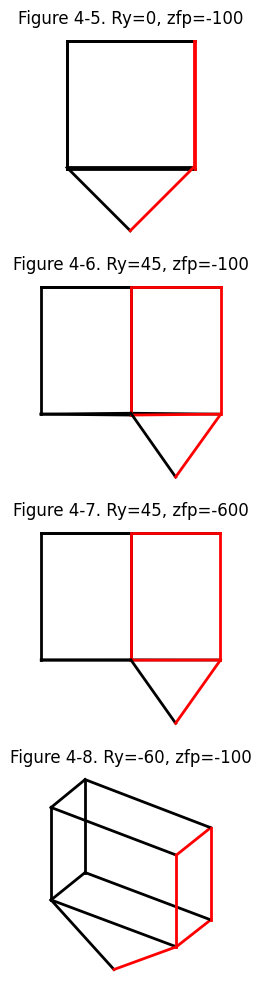

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_y(points, angle_deg):
    theta = np.radians(angle_deg)
    Ry = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return points @ Ry.T

def perspective_projection(points, zfp, xfp=0, yfp=0, xc=0, yc=0):
    projected = []
    for x, y, z in points:
        factor = zfp / (zfp - z)
        xp = x * factor + xc - xfp * factor
        yp = y * factor + yc - yfp * factor
        projected.append([xp, yp])
    return np.array(projected)

def draw_house(ax, points2d):
    # Definisikan sisi-sisi rumah
    edges = [
        (0,1), (1,2), (2,3), (3,0),  # dasar
        (4,5), (5,6), (6,7), (7,4),  # atas
        (0,4), (1,5), (2,6), (3,7),  # vertikal
        (4,8), (5,8)                 # atap
    ]

    front_edges = {(1,2), (2,6), (5,6), (5,1), (5,8)}  # sisi depan
    for i, j in edges:
        color = 'r' if (i, j) in front_edges or (j, i) in front_edges else 'k'
        ax.plot([points2d[i][0], points2d[j][0]],
                [points2d[i][1], points2d[j][1]], color, linewidth=2)

def generate_house():
    # Titik dasar (persegi panjang bawah)
    base = np.array([
        [0, 0, 0],    # 0
        [1, 0, 0],    # 1
        [1, 0, -1],   # 2
        [0, 0, -1],   # 3
    ])
    # Titik atas (atap datar)
    top = base + np.array([0, 1, 0])  # 4-7
    # Titik atap segitiga
    roof = np.array([[0.5, 1.5, 0]])  # 8
    return np.vstack((base, top, roof))

# Konfigurasi mirip Figure 4-5 s/d 4-8
configs = [
    (0, -100, 0, 0, 0, 0),            # Figure 4-5
    (45, -100, 0, 0, 0, 0),           # Figure 4-6
    (45, -600, 0, 0, 0, 0),           # Figure 4-7
    (-60, -100, 40, 70, 100, 60)      # Figure 4-8
]

# Buat plot vertikal
fig, axs = plt.subplots(4, 1, figsize=(4, 10))
house = generate_house()

for i, (Ry_angle, zfp, xc, yc, xfp, yfp) in enumerate(configs):
    rotated = rotate_y(house, Ry_angle)
    projected = perspective_projection(rotated, zfp, xfp, yfp, xc, yc)
    axs[i].set_title(f"Figure 4-{i+5}. Ry={Ry_angle}, zfp={zfp}")
    draw_house(axs[i], projected)
    axs[i].set_aspect('equal')
    axs[i].invert_yaxis()  # Agar orientasi mirip dokumen asli
    axs[i].axis('off')

plt.tight_layout()
plt.show()
